### Réduction de dimension

####  prédiction des activités d'un groupe de personne via données smarpthone

The purpose of this small project is to significantly reduce the dimension of a dataset used for a classification problem. The packages used will be numpy, pandas, matplotlib, scikit-learn and its subpackages. A brief description of the dataset is presented below.

Data set

The dataset is derived from an experiment performed on 30 volunteers between 19 and 48 years old. For each observation, one person performed one of six activities (walking, stair climbing, stair descending, sitting, standing, lying down) while wearing a smartphone at the waist. The dataset was constructed using the smartphone sensors and mathematical transformation (jerk, ...). 

The objective of the exercise is to predict the activity based on the 562 explanatory variables. Because of the large number of explanatory variables, a selection and a dimension reduction is necessary.

In [2]:
#Execute the following cell to import the packages necessary for the exercise.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler    

Charger le fichier "activity.csv" dans un DataFrame appelé df

NB : a première colonne n'est pas une colonne d'indices.

In [94]:
df = pd.read_csv('/Users/shahul/Desktop/train.csv',index_col=False)

df['Activity'] = df['Activity'].replace(
    ['LAYING','SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'],
    [0,1,2,3,4,5])
df = df.drop(['subject'], axis = 1)
df = df.drop(df.index[3609:7352],0)


df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,2


  La correspondance entre les labels et les activités associées est la suivante :
    label 	Activity
    0 	LAYING
    1 	SITTING
    2 	STANDING
    3 	WALKING
    4 	WALKING_DOWNSTAIRS
    5 	WALKING_UPSTAIRS

Stocker dans une table target la variable cible "activity" et supprimer la colonne "activity" de df.

In [4]:
target = df.Activity
data = df.drop(['Activity'], axis=1)
#target

Display the correlation matrix of the dataset as a heatmap (the number of features is important, recommended
of features is important, recommended at least one figsize=(50, 50)).

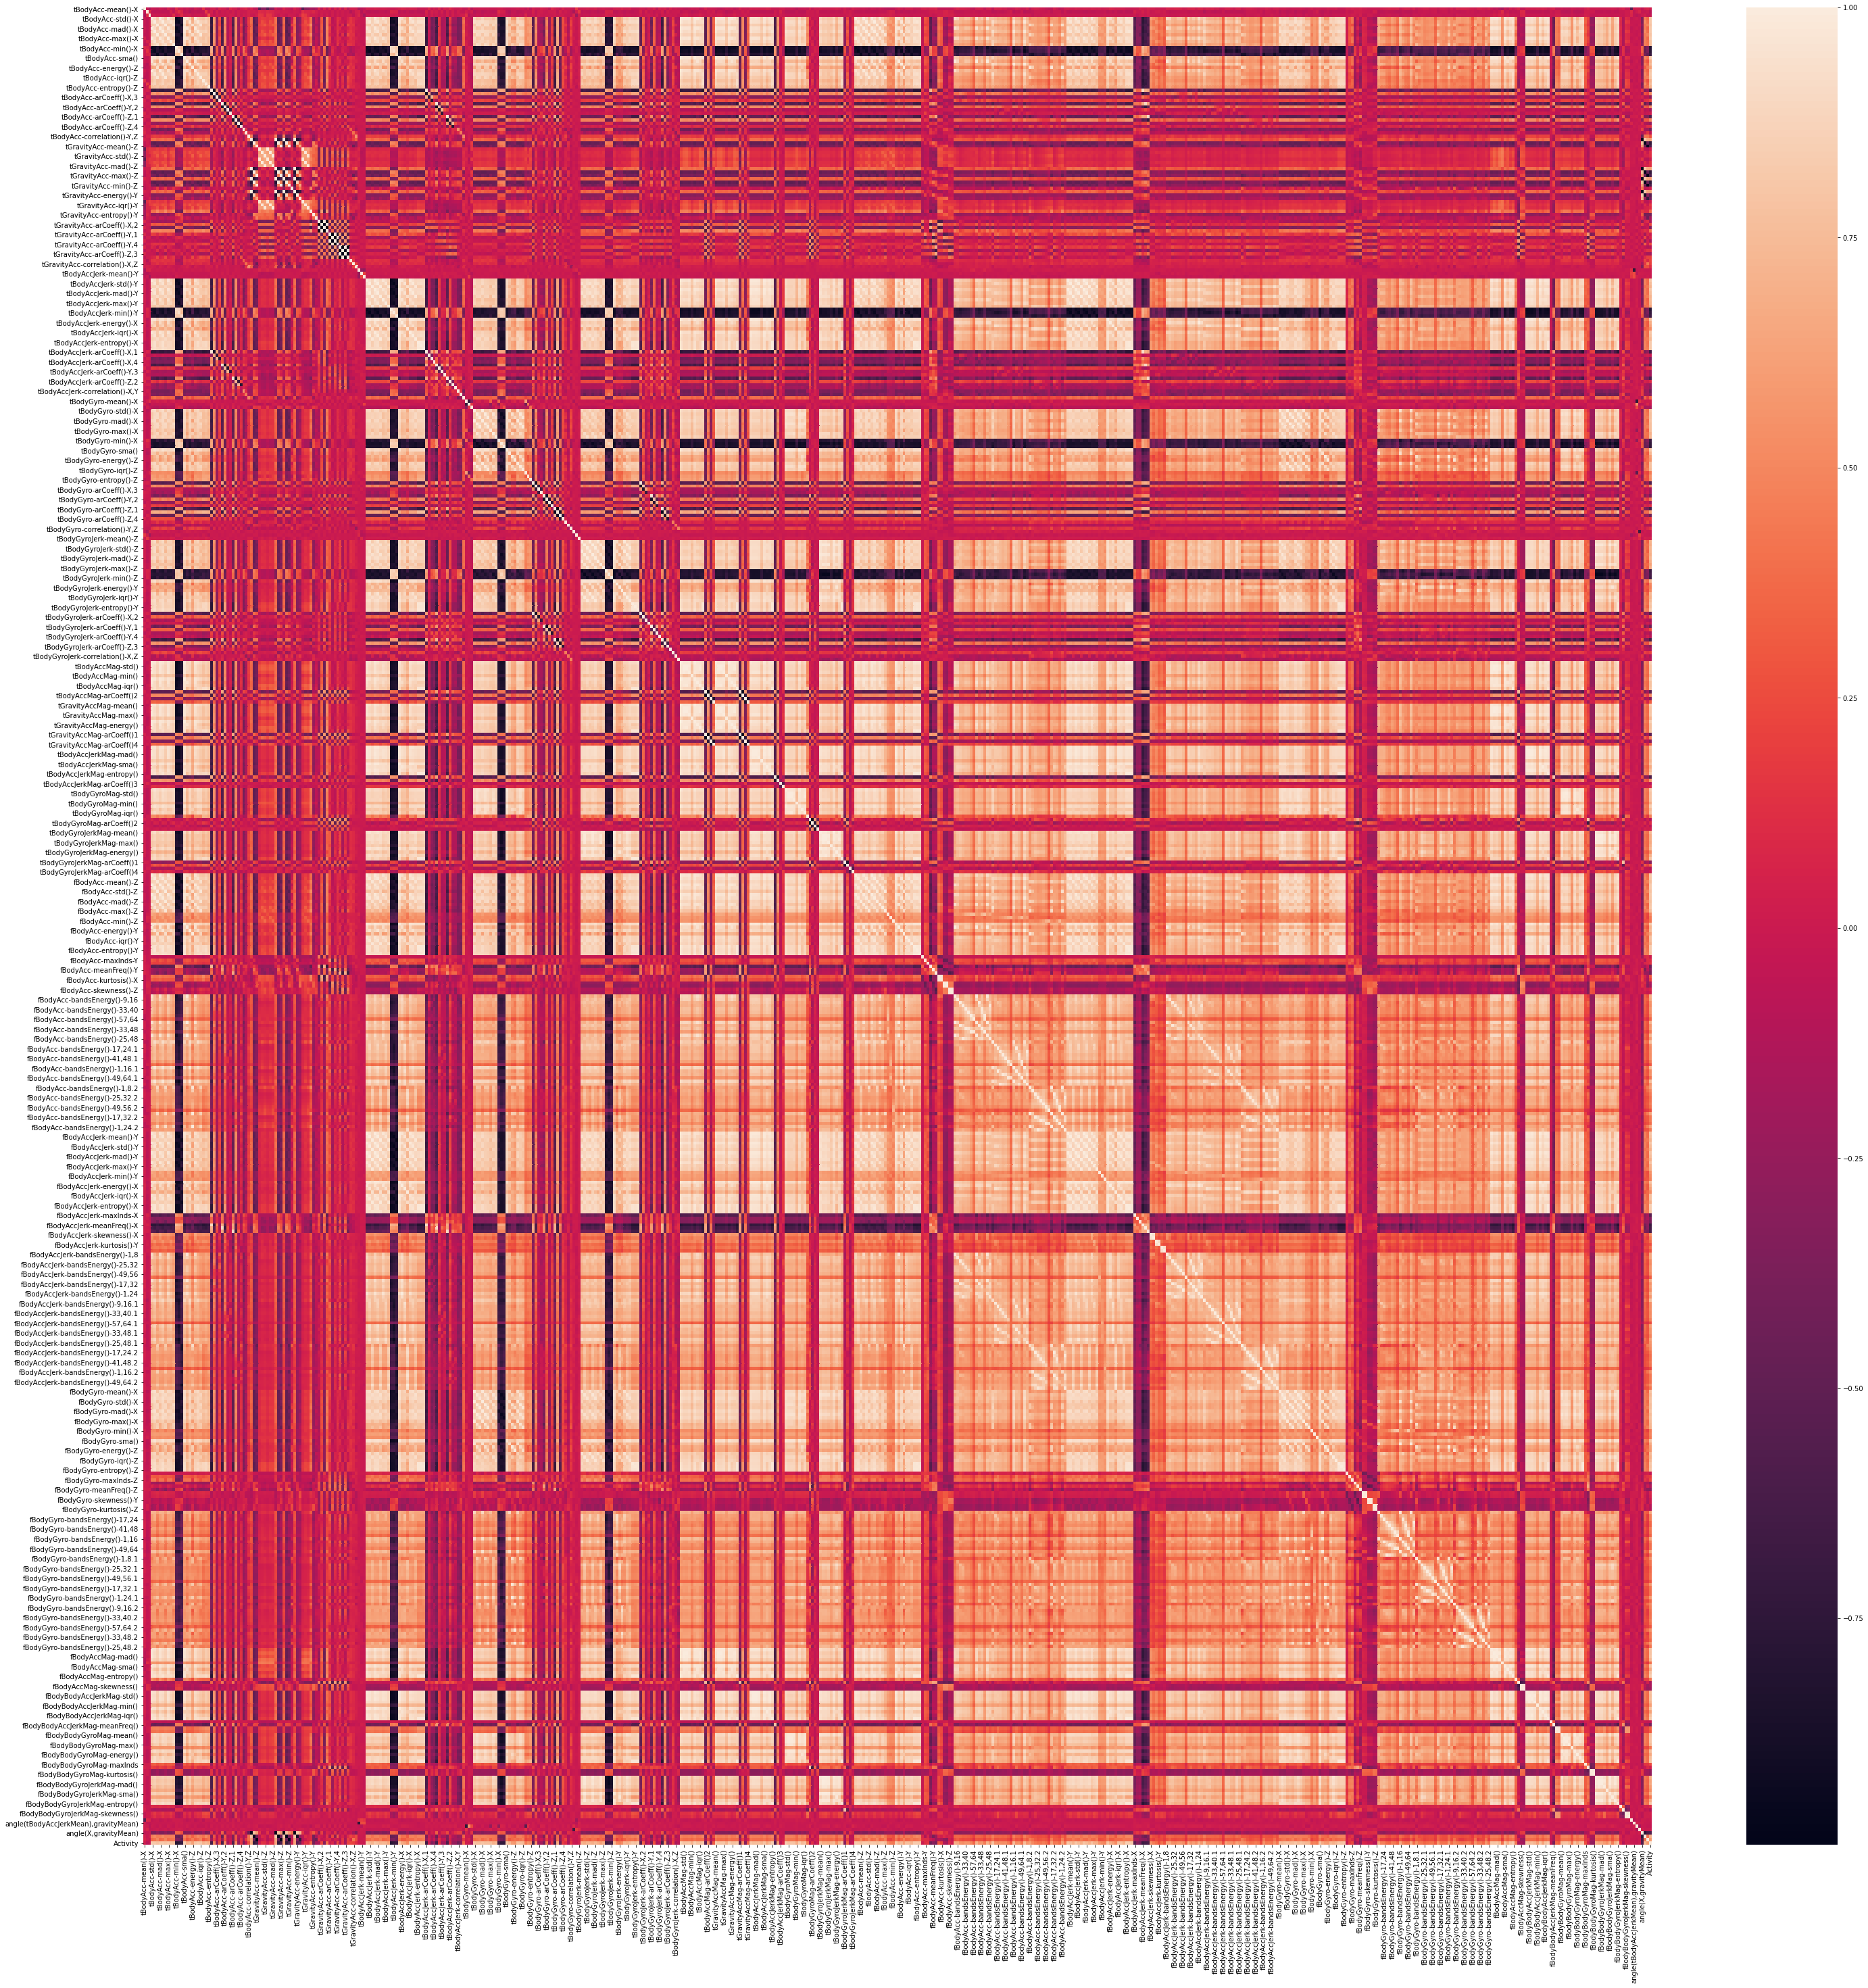

In [95]:
plt.subplots(figsize=(50,50))

#correlation matrice
corr_matrice = df.corr()

#heatmap
sns.heatmap(corr_matrice);

Separate the data into two: a training and a test sample. We will take a 80% distribution on the training data and instantiate a random seed at 1234.
We will name the data sets X_train, Y_train, X_test and Y_test.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = .2, random_state = 1234)


Eliminate all explanatory variables that have a variance of less than 0.01 using VarianceThreshold less than 0.01.
Transform the training set and store it in a variable X_train_sel.
Transform the test set and store it in a variable X_test_sel.
Display the selector mask.

In [6]:
sel = VarianceThreshold(threshold = 0.01)
sel.fit(X_train);

X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

Normalize with StandardScaler X_train and X_test.
Normalize with StandardScaler X_train_sel and X_test_sel.

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_sel = scaler.fit_transform(X_train_sel)
X_test_sel = scaler.transform(X_test_sel)

Fit a k=5 nearest neighbor classifier on the training set X_train and Y_train.
Compute the score of this classifier on the test set.

In [97]:

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)

#check accuracy of our model on the test data
score_ref = KNN.score(X_test, Y_test)
print(score_ref)


0.9570637119113573


The previously computed score will be used as a reference to compare the performance of the classifier performance using a dimension reduction approach.

Fit a k nearest neighbor classifier for k=5 on the training set X_train_sel and Y_train_sel.
Compute the score of the model on the test set.
What do we notice?

In [99]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_sel, Y_train)

#check accuracy of our model on the test data
score_sel = KNN.score(X_test_sel, Y_test)
print(score_sel)

print(''' on remarque que le score sans les variables explicatives qui ont une variance
inférieure à 0.01 est meilleur que le score de reference. 
''')

0.9598337950138505
 on remarque que le score sans les variables explicatives qui ont une variance
inférieure à 0.01 est meilleur que le score de reference. 



Fit on the training set X_train_sel a PCA that keeps only the 100 main components.
Store in a new variable X_train_pca the result of this transformation.
Using matplotlib, plot the scatterplot of the data in the dimensional space by coloring the points according to their class.

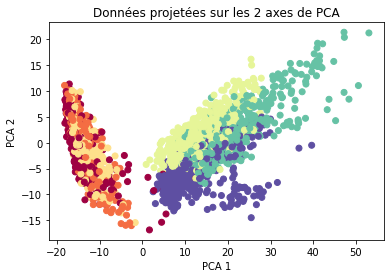

In [100]:
pca = PCA(n_components = 100)
X_train_pca = pca.fit_transform(X_train_sel)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = Y_train, cmap=plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();



Transform the test set X_test_sel with the PCA and store the result in a variable X_test_pca.
Fit a k nearest neighbor classifier for k=5 on the training set in reduced dimension.
Compute the prediction score on the new test set.

In [35]:
#we suppose to keep a pca with same 100 components as nothing were mentionned about
X_test_pca = pca.transform(X_test_sel)

KNN.fit(X_train_pca, Y_train)

#check accuracy of our model on the test data
score_pca = KNN.score(X_test_pca, Y_test)
print(score_pca)

0.9542936288088643


Calculate and store in a list the prediction score of the model according to the parameter reduction parameter of the PCA. We will calculate the score for k∈[1:200]k∈[1:200].
Plot the prediction score of the model as a function of the evolution of the reduction of dimension.

In [36]:
score_pred = []

for i in range(1,201):
    pca = PCA(n_components = i)
    X_train_pca = pca.fit_transform(X_train_sel)
    X_test_pca = pca.transform(X_test_sel)
    KNN.fit(X_train_pca, Y_train)
    score_pred.append(KNN.score(X_test_pca, Y_test))



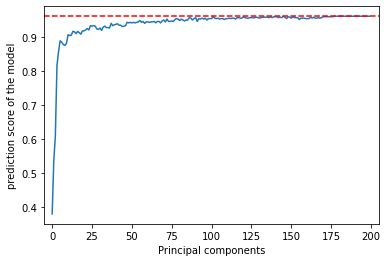

In [105]:
plt.figure()
plt.xlim(-5,205)
plt.plot(score_pred);
plt.ylabel('prediction score of the model')
plt.xlabel('Principal components')
plt.axhline(y = 0.961218836565097, color ='r', linestyle = '--')


Qu'elle est le score maximum et pour quelle réduction ?

In [104]:

#we transform the list into dataframe for more convenience
sp = pd.DataFrame(score_pred,columns=['score_pred'])
sp.head()

#to know the number of component for maximum score
reqd_Index = list(np.where(sp["score_pred"] == 0.961218836565097))
print("ajouter +1 pour le num de composants ",reqd_Index, "\n")
#we will add +1 to index to link it xith number of components as it start from 0

'''
on remarque qu'on atteint le score maximum de 0.9612 à partir 178 nombre de features et ceux jusqu'a 200. On observe un
pic solo a 146 mais on va supposer qu'il ne sagit pas du moment ideal. 
'''
print("le score maximum est :",max(score_pred), "plus elevé que le score de référence")
print('pour 130 features sur 562 soit une reduction 76,86% ')





ajouter +1 pour le num de composants  [array([145, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199])] 

le score maximum est : 0.961218836565097 plus elevé que le score de référence
pour 130 features sur 562 soit une reduction 76,86% 
